In [ ]:
import pandas as pd
import os

In [ ]:
os.chdir("D:\QTM")
ED= pd.ExcelFile('Ecommerce_data.xlsx')
ED

In [75]:
print(ED.sheet_names)

['Orders', 'Returns', 'People']


In [76]:
orders_df = pd.read_excel(ED, 'Orders')
returns_df = pd.read_excel(ED, 'Returns')
people_df = pd.read_excel(ED, 'People')

In [77]:
orders_df.head(), returns_df.head(), people_df.head()

(   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
 0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
 1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
 2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
 3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
 4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   
 
     Customer ID     Customer Name      Segment  Postal Code           City  \
 0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
 1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
 2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
 3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
 4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   
 
    ... Sub-Category                               Product Name   

In [78]:
merged_df = pd.merge(orders_df, returns_df, on='Order ID')
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unnamed: 24,Unnamed: 25,Returned,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.160,2,0.0,720.3600,725.570,Critical,NaN,NaN,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.500,5,0.0,153.7500,627.270,Critical,NaN,NaN,Yes,Eastern Asia
2,25438,IN-2015-JH158207-42140,2015-05-16,2015-05-18,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,2863.350,5,0.1,858.9000,581.880,Critical,NaN,NaN,Yes,Oceania
3,32648,CA-2014-AS10045140-41727,2014-03-29,2014-04-01,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,31.400,2,0.0,7.8500,3.810,Medium,NaN,NaN,Yes,Southern US
4,29629,IN-2014-LC168857-41747,2014-04-18,2014-04-19,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,1601.640,5,0.1,587.1900,511.470,Critical,NaN,NaN,Yes,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1359,MX-2012-ME1732018-41164,2012-09-12,2012-09-15,Second Class,ME-1732018,Maria Etezadi,Home Office,NaN,Bagé,...,12.500,1,0.0,5.3600,1.064,Medium,NaN,NaN,Yes,South America
2216,23767,IN-2013-CC1261027-41286,2013-01-12,2013-01-16,Standard Class,CC-1261027,Corey Catlett,Corporate,NaN,Nantong,...,10.860,1,0.0,5.4300,1.060,High,NaN,NaN,Yes,Eastern Asia
2217,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,...,38.976,3,0.6,-50.6688,5.290,Low,NaN,NaN,Yes,Central US
2218,41315,EG-2014-PM894038-41846,2014-07-26,2014-07-30,Standard Class,PM-894038,Paul MacIntyre,Consumer,NaN,Alexandria,...,25.830,1,0.0,9.0300,1.050,Medium,NaN,NaN,Yes,North Africa


In [79]:
merged_df.shape

(2220, 28)

In [80]:
merged_df.isnull().any().sum()

3

In [81]:
ED = merged_df.dropna(axis=1)

In [82]:
ED.shape

(2220, 25)

In [83]:
list(ED)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Region_x',
 'Market',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority',
 'Returned',
 'Region_y']

### 1.What is the total value of the order that was returned?

In [84]:
total_returned_value =ED['Sales'].sum()
print('The Total Returned Value is',total_returned_value)

The Total Returned Value is 525932.22736


### 2.What is the total returned value by region?

In [85]:
returned_value_by_region = ED.groupby(['Region_y'])[['Sales']].sum()
returned_value_by_region

,Sales
Region_y,
Caribbean,9679.32828
Central Africa,4038.48000
Central America,44334.79916
Central Asia,359.03100
Central US,23306.14500
Eastern Africa,2026.44000
Eastern Asia,47798.04300
Eastern Canada,2639.91000
Eastern Europe,9501.21000


### 3. What is the total returned value for category and sub_category using product id?

In [86]:
df2 = pd.ExcelFile('Ecommerce_data.xlsx')
df2

In [87]:
orders_df = pd.read_excel(df2, 'Orders')
returns_df = pd.read_excel(df2, 'Returns')

In [88]:
merged_df = pd.merge(orders_df, returns_df, on='Order ID')

In [89]:
returned_value_by_category = merged_df.groupby(['Category', 'Sub-Category'])[['Sales']].sum()
returned_value_by_category

Sales
Category        Sub-Category             
Furniture       Bookcases     60710.99170
                Chairs        57439.11790
                Furnishings   16581.79860
                Tables        33283.15700
Office Supplies Appliances    32975.10160
                Art           16221.50620
                Binders       23571.83300
                Envelopes      6784.22590
                Fasteners      3098.36380
                Labels         3349.15170
                Paper          9928.68380
                Storage       52938.56010
                Supplies       8327.68320
Technology      Accessories   33991.09180
                Copiers       65145.83696
                Machines      32550.62610
                Phones        69034.49800

### 4. What is total number of products returned whose unit price is more than 100dollars?

In [91]:
ED['Unit Price'] = ec['Sales'] / ED['Quantity']
ED

C:\Users\kiran\AppData\Local\Temp\ipykernel_29016\3337844645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ED['Unit Price'] = ec['Sales'] / ED['Quantity']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Region_y,Unit Price
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Lesro Conference Table, with Bottom Storage",1715.160,2,0.0,720.3600,725.570,Critical,Yes,Eastern Asia,857.580
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,"Safco Classic Bookcase, Pine",2197.500,5,0.0,153.7500,627.270,Critical,Yes,Eastern Asia,439.500
2,25438,IN-2015-JH158207-42140,2015-05-16,2015-05-18,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,...,"Apple Smart Phone, Cordless",2863.350,5,0.1,858.9000,581.880,Critical,Yes,Oceania,572.670
3,32648,CA-2014-AS10045140-41727,2014-03-29,2014-04-01,First Class,AS-100451408,Aaron Smayling,Corporate,Arlington,Virginia,...,Hanging Personal Folder File,31.400,2,0.0,7.8500,3.810,Medium,Yes,Southern US,15.700
4,29629,IN-2014-LC168857-41747,2014-04-18,2014-04-19,First Class,LC-168857,Lena Creighton,Consumer,Sydney,New South Wales,...,"Sharp Wireless Fax, Laser",1601.640,5,0.1,587.1900,511.470,Critical,Yes,Oceania,320.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1359,MX-2012-ME1732018-41164,2012-09-12,2012-09-15,Second Class,ME-1732018,Maria Etezadi,Home Office,Bagé,Rio Grande do Sul,...,"Fellowes Box, Wire Frame",12.500,1,0.0,5.3600,1.064,Medium,Yes,South America,12.500
2216,23767,IN-2013-CC1261027-41286,2013-01-12,2013-01-16,Standard Class,CC-1261027,Corey Catlett,Corporate,Nantong,Jiangsu,...,"Novimex Legal Exhibit Labels, 5000 Label Set",10.860,1,0.0,5.4300,1.060,High,Yes,Eastern Asia,10.860
2217,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,Chicago,Illinois,...,Tenex Chairmats For Use with Hard Floors,38.976,3,0.6,-50.6688,5.290,Low,Yes,Central US,12.992
2218,41315,EG-2014-PM894038-41846,2014-07-26,2014-07-30,Standard Class,PM-894038,Paul MacIntyre,Consumer,Alexandria,Al Iskandariyah,...,"Sanford Pencil Sharpener, Fluorescent",25.830,1,0.0,9.0300,1.050,Medium,Yes,North Africa,25.830


In [92]:
ED1 = ED[ED['Unit Price'] > 100]
total_returned_products = ED1['Quantity'].sum()
print('The Total Returned Products is', total_returned_products)

The Total Returned Products is 1607


### 5. How many of the orders deliverd on the same day, 7days, 15days and >30 days?

In [93]:
ED['delivery_days'] = (ED['Ship Date'] - ED['Order Date']).dt.days
ED

C:\Users\kiran\AppData\Local\Temp\ipykernel_29016\994465019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ED['delivery_days'] = (ED['Ship Date'] - ED['Order Date']).dt.days


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Region_y,Unit Price,delivery_days
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,1715.160,2,0.0,720.3600,725.570,Critical,Yes,Eastern Asia,857.580,3
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,2197.500,5,0.0,153.7500,627.270,Critical,Yes,Eastern Asia,439.500,3
2,25438,IN-2015-JH158207-42140,2015-05-16,2015-05-18,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,...,2863.350,5,0.1,858.9000,581.880,Critical,Yes,Oceania,572.670,2
3,32648,CA-2014-AS10045140-41727,2014-03-29,2014-04-01,First Class,AS-100451408,Aaron Smayling,Corporate,Arlington,Virginia,...,31.400,2,0.0,7.8500,3.810,Medium,Yes,Southern US,15.700,3
4,29629,IN-2014-LC168857-41747,2014-04-18,2014-04-19,First Class,LC-168857,Lena Creighton,Consumer,Sydney,New South Wales,...,1601.640,5,0.1,587.1900,511.470,Critical,Yes,Oceania,320.328,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1359,MX-2012-ME1732018-41164,2012-09-12,2012-09-15,Second Class,ME-1732018,Maria Etezadi,Home Office,Bagé,Rio Grande do Sul,...,12.500,1,0.0,5.3600,1.064,Medium,Yes,South America,12.500,3
2216,23767,IN-2013-CC1261027-41286,2013-01-12,2013-01-16,Standard Class,CC-1261027,Corey Catlett,Corporate,Nantong,Jiangsu,...,10.860,1,0.0,5.4300,1.060,High,Yes,Eastern Asia,10.860,4
2217,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,Chicago,Illinois,...,38.976,3,0.6,-50.6688,5.290,Low,Yes,Central US,12.992,7
2218,41315,EG-2014-PM894038-41846,2014-07-26,2014-07-30,Standard Class,PM-894038,Paul MacIntyre,Consumer,Alexandria,Al Iskandariyah,...,25.830,1,0.0,9.0300,1.050,Medium,Yes,North Africa,25.830,4


In [94]:
same_day = ED[ED['delivery_days'] == 0].shape[0]
within_7_days = ED[(ED['delivery_days'] > 0) & (ED['delivery_days'] <= 7)].shape[0]
within_15_days = ED[(ED['delivery_days'] > 7) & (ED['delivery_days'] <= 15)].shape[0]
more_than_30_days = ED[ED['delivery_days'] > 30].shape[0]

In [95]:
print(f"Same Day: {same_day}")
print(f"Within 7 Days: {within_7_days}")
print(f"Within 15 Days: {within_15_days}")
print(f"More than 30 Days: {more_than_30_days}")

Same Day: 115
Within 7 Days: 2105
Within 15 Days: 0
More than 30 Days: 0


### 6. Check the relationship between price and quantity?

In [96]:
from scipy.stats import pearsonr

In [97]:
 pearsonr(ec['Unit Price'],ec['Quantity'])

PearsonRResult(statistic=-0.02833034445143095, pvalue=0.18208808203216745)

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

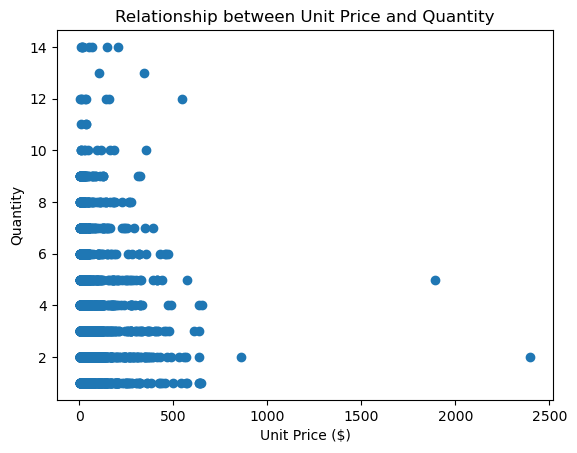

In [99]:
plt.scatter(ec['Unit Price'], ec['Quantity'])
plt.title('Relationship between Unit Price and Quantity')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity')
plt.show()

### 7. Use the calculation from question 5 and order priority. Check is there any relationship between order priority and days taken.

In [100]:
from scipy import stats

In [101]:
priority_delivery_stats = ec.groupby('Order Priority')['delivery_days'].describe()
print(priority_delivery_stats)

                 count      mean       std  min  25%  50%  75%  max
Order Priority                                                     
Critical         188.0  1.750000  1.135829  0.0  1.0  2.0  3.0  3.0
High             643.0  3.205288  1.453807  0.0  2.0  4.0  4.0  5.0
Low              125.0  6.552000  0.499290  6.0  6.0  7.0  7.0  7.0
Medium          1264.0  4.528481  1.393053  0.0  4.0  5.0  5.0  7.0


In [102]:
anova_result = stats.f_oneway(
    ED[ED['Order Priority'] == 'Low']['delivery_days'],
    ED[ED['Order Priority'] == 'Medium']['delivery_days'],
    ED[ED['Order Priority'] == 'High']['delivery_days'],
    ED[ED['Order Priority'] == 'Critical']['delivery_days'])

print(f"ANOVA result: {anova_result}")

ANOVA result: F_onewayResult(statistic=456.9001010529552, pvalue=4.5231641873318744e-231)


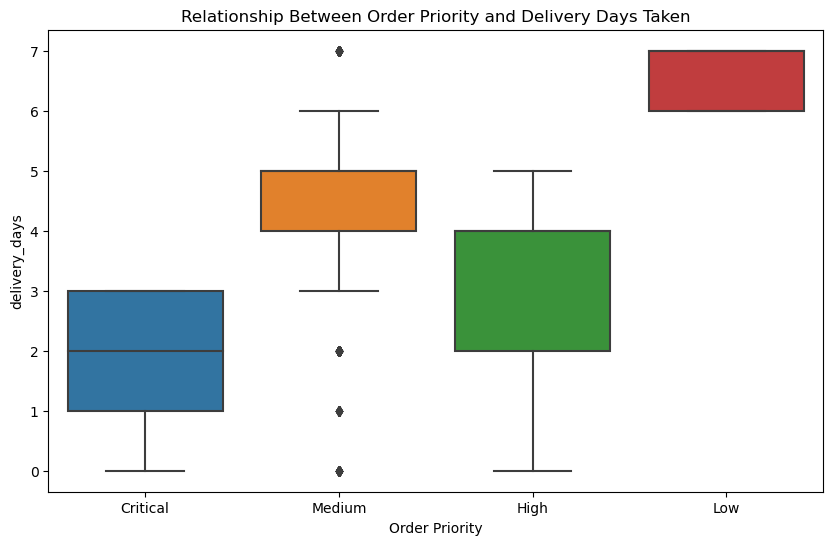

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order Priority', y='delivery_days', data=ec)
plt.title('Relationship Between Order Priority and Delivery Days Taken')
plt.show()